In [1]:
# print("Hello World")
# from statannotations.Annotator import Annotator
from adjustText import adjust_text

In [2]:
import scanpy as sc
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import anndata as ad
from collections import Counter
import gc 
gc.enable()

In [3]:
sc.settings.verbosity = 3  
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                 10.3.0
adjustText          1.1.1
asttokens           NA
backcall            0.2.0
bottleneck          1.3.7
comm                0.2.1
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.6.7
decorator           5.1.1
exceptiongroup      1.2.0
executing           0.8.3
h5py                3.11.0
igraph              0.11.5
importlib_resources NA
ipykernel           6.28.0
jedi                0.18.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.42.0
matplotlib          3.7.5
mpl_toolkits        NA
natsort             8.4.0
numba               0.59.1
numexpr             2.8.7
numpy               1.26.4
packaging           24.0
pandas              2.2.2
parso               0.8.3
patsy               0.5.6
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
platformdirs     

In [6]:
# tms_adata = sc.read_h5ad("/hpc/projects/tabula_sapiens/singlecell_transcriptomics/TSP1_30_Paper2_Version2d_Oct2024/full_object/TSP1_30_min200_2500_decontx_scvi_donorassay_version2d_20241112.h5ad")
# tms_adata

In [5]:
del tms_adata.layers["decontXcounts"]
del tms_adata.layers["log_normalized"]
del tms_adata.layers["scale_data"]

In [6]:
del tms_adata.obsm["X_scvi"]
del tms_adata.obsm['X_umap_scvi_full_donorassay']
del tms_adata.obsm['X_uncorrected_umap']
del tms_adata.obsm['X_uncorrected_alltissues_umap']

In [7]:
del tms_adata.uns['_scvi_manager_uuid']
del tms_adata.uns['_scvi_uuid']
del tms_adata.uns['_training_mode']

In [8]:
tms_adata.obs = tms_adata.obs.drop(columns=['_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full'])

In [9]:
metadata = pd.read_csv("./../tabula_sapiens/DonorData.txt", sep="\t")
metadata["donor"] = ["TSP" + str(int(x.split("Donor")[1])) for x in metadata["Donors"]]
tms_adata.obs = tms_adata.obs.reset_index().merge(metadata, on="donor").set_index('index').loc[tms_adata.obs_names,]
tms_adata.obs["Age"] = tms_adata.obs["Age"].astype(int)

In [10]:
tms_adata.obs = tms_adata.obs.drop(columns=['Unnamed: 16'])

In [11]:
print(tms_adata.shape)
print(tms_adata.obs.shape)
tms_adata.obs.columns

(1136218, 61806)
(1136218, 52)


Index(['donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate',
       'library_plate', 'notes', 'cdna_well', 'old_index', 'assay',
       'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal',
       'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay',
       'cell_ontology_class', 'cell_ontology_id', 'compartment',
       'broad_cell_class', 'free_annotation', 'manually_annotated',
       'published_2022', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc',
       'pct_counts_ercc', 'age', 'sex', 'ethnicity', 'sample_number', 'Donors',
       'Age', 'Sex', 'Ethnicity', 'Race', 'BMI (kg/m2)', 'Downtime (min)',
       'Cause of Death', 'Tobacco ( > 20 pack-years)', 'Alcohol',
       'IV Drug abuse', 'Diabetes', 'Cancer', 'Hypertension',
       'Coronary Artery Disease', 'Other noted conditions'],
      dtype='object')

In [14]:
# tms_adata.write_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_filtered_200gene_2500UMI_donorassay_version2d_withmetadata.h5ad")

In [14]:
tms_adata = sc.read_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_filtered_200gene_2500UMI_donorassay_version2d_withmetadata.h5ad")

In [48]:
metadata = pd.read_csv("./../tabula_sapiens/DonorData.txt", sep="\t")

In [52]:
metadata.columns

Index(['Donors', 'Age', 'Sex', 'Ethnicity', 'Race', 'BMI (kg/m2)',
       'Downtime (min)', 'Cause of Death', 'Tobacco ( > 20 pack-years)',
       'Alcohol', 'IV Drug abuse', 'Diabetes', 'Cancer', 'Hypertension',
       'Coronary Artery Disease', 'Other noted conditions', 'Unnamed: 16'],
      dtype='object')

In [55]:
tms_adata.obs["tissue_Sex"] = tms_adata.obs["tissue"].astype(str) + "_" + tms_adata.obs["Sex"].astype(str)
freq_table = tms_adata.obs.drop_duplicates(subset=["donor", "tissue", "Sex"]).groupby(["tissue", "Sex"]).size().reset_index(name='count')
freq_table["tissue_Sex"] = freq_table["tissue"].astype(str) + "_" + freq_table["Sex"].astype(str)
print(freq_table[freq_table["count"] == 1].tissue_Sex.values)
tissue_sex_filter = freq_table[freq_table["count"] > 1].tissue_Sex.values

['Ear_F' 'Ear_M' 'Eye_M' 'Kidney_F' 'Liver_F' 'Pancreas_M' 'Stomach_M'
 'Testis_M']


/tmp/ipykernel_1056943/4278607564.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata.obs.drop_duplicates(subset=["donor", "tissue", "Sex"]).groupby(["tissue", "Sex"]).size().reset_index(name='count')


In [66]:
filtered_metadata = tms_adata[tms_adata.obs["tissue_Sex"].isin(freq_table[freq_table["count"] == 1].tissue_Sex.values)].obs
filtered_metadata.shape

(52149, 62)

In [65]:
filtered_metadata["tissue"].value_counts()

tissue
Kidney      11376
Stomach      9212
Liver        7888
Testis       7513
Pancreas     7057
Eye          6048
Ear          3055
Name: count, dtype: int64

In [62]:
filtered_metadata["donor"].value_counts()

donor
TSP25    19401
TSP2     11376
TSP19     7888
TSP9      7057
TSP15     6048
TSP21      379
Name: count, dtype: int64

In [41]:
# del tms_adata.uns["age_colors"]
# tms_adata.write_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_filtered_200gene_2500UMI_donorassay_version2d_cellxgene.h5ad")

In [24]:
print(tms_adata.shape)
print(tms_adata.obs.shape)

(1136218, 61806)
(1136218, 52)


In [27]:
tms_adata.obs['CDKN2A+ MKI67-'] = np.where(((tms_adata[:,['CDKN2A']].to_df()["CDKN2A"]>0.0) & (tms_adata[:,['MKI67']].to_df()["MKI67"] == 0.0)), 'Positive', 'Negative')
tms_adata.obs['CDKN2A+ MKI67-'].value_counts()

CDKN2A+ MKI67-
Negative    1082913
Positive      53305
Name: count, dtype: int64


In [28]:
tms_adata.obs = tms_adata.obs.join(pd.read_csv("./../ts_celltypes.csv")[["cell_ontology_class", "broader_cell_class"]].set_index("cell_ontology_class"), on="cell_ontology_class")

In [29]:
tms_adata.obs["Age group"] = pd.NA
tms_adata.obs["Age group"][(tms_adata.obs["Age"]  < 40.0)] = "Young"
tms_adata.obs["Age group"][(tms_adata.obs["Age"]  >= 40.0) & (tms_adata.obs["Age"]  < 60.0)] = "Middle"
tms_adata.obs["Age group"][(tms_adata.obs["Age"]  >= 60.0)] = "Old"
# tms_adata.obs["Age group"] = tms_adata.obs["Age group"].astype("category").cat.reorder_categories(["Young", "Old"])
tms_adata.obs["Age group"] = tms_adata.obs["Age group"].astype("category").cat.reorder_categories(["Young", "Middle", "Old"])
tms_adata.obs["Age group"].value_counts()

/tmp/ipykernel_597092/50618339.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tms_adata.obs["Age group"][(tms_adata.obs["Age"]  < 40.0)] = "Young"
/tmp/ipykernel_597092/50618339.py:2: SettingWithCopyWarning: 
A value is trying to be set

Age group
Middle    622533
Old       413431
Young     100254
Name: count, dtype: int64

In [30]:
tms_adata.obs["donor_tissue_celltype"] = tms_adata.obs[["donor", "tissue", "cell_ontology_class"]].apply(lambda row: '__'.join(row.values.astype(str)), axis=1)
tms_adata.obs["donor_tissue_celltype"] = tms_adata.obs["donor_tissue_celltype"].astype("category")
tms_adata.obs["tissue_celltype"] = tms_adata.obs[["tissue", "cell_ontology_class"]].apply(lambda row: '__'.join(row.values.astype(str)), axis=1)
tms_adata.obs["tissue_celltype"] = tms_adata.obs["tissue_celltype"].astype("category")

tms_adata.obs["donor_tissue_broadcelltype"] = tms_adata.obs[["donor", "tissue", "broad_cell_class"]].apply(lambda row: '__'.join(row.values.astype(str)), axis=1)
tms_adata.obs["donor_tissue_broadcelltype"] = tms_adata.obs["donor_tissue_broadcelltype"].astype("category")
tms_adata.obs["tissue_broadcelltype"] = tms_adata.obs[["tissue", "broad_cell_class"]].apply(lambda row: '__'.join(row.values.astype(str)), axis=1)
tms_adata.obs["tissue_broadcelltype"] = tms_adata.obs["tissue_broadcelltype"].astype("category")

tms_adata.obs["donor_tissue_broadercelltype"] = tms_adata.obs[["donor", "tissue", "broader_cell_class"]].apply(lambda row: '__'.join(row.values.astype(str)), axis=1)
tms_adata.obs["donor_tissue_broadercelltype"] = tms_adata.obs["donor_tissue_broadercelltype"].astype("category")
tms_adata.obs["tissue_broadercelltype"] = tms_adata.obs[["tissue", "broader_cell_class"]].apply(lambda row: '__'.join(row.values.astype(str)), axis=1)
tms_adata.obs["tissue_broadercelltype"] = tms_adata.obs["tissue_broadercelltype"].astype("category")

tms_adata.obs.donor = tms_adata.obs.donor.astype("category")
tms_adata.obs.tissue = tms_adata.obs.tissue.astype("category")
tms_adata.obs.broad_cell_class = tms_adata.obs.broad_cell_class.astype("category")
tms_adata.obs.broader_cell_class = tms_adata.obs.broader_cell_class.astype("category")

In [31]:
# Cross tabulation between Cdkn2a and age
Crosstab_cdkn2a = pd.crosstab(index=tms_adata.obs['CDKN2A+ MKI67-'],columns=tms_adata.obs['Age'])
print(Crosstab_cdkn2a)

Age              22     26     33    36     37     38    40    42      45  \
CDKN2A+ MKI67-                                                              
Negative        459  19753  24358  7550  19271  25008  2468  2417  149277   
Positive          2    313    765   338   1323   1114   408   135    8747   

Age               46     55      56    57      59      60      61     67  \
CDKN2A+ MKI67-                                                             
Negative        4436  21583  159677  3657  249427  171445  140322  11923   
Positive        1612    208    7300   571   10610    9279    6527    683   

Age                69     74  
CDKN2A+ MKI67-                
Negative        58113  11769  
Positive         3092    278  


In [19]:
# Cross tabulation between Cdkn2a and age
Crosstab_tissue = pd.crosstab(index=tms_adata.obs['Sex'],columns=tms_adata.obs['donor'])
print(Crosstab_tissue)

donor   TSP1    TSP2  TSP3   TSP4  TSP5   TSP6   TSP7   TSP8  TSP9  TSP10  \
Sex                                                                         
F      46507  146849  4228  26122  2876      0  61205      0     0      0   
M          0       0     0      0     0  12606      0  19980  7057  25123   

donor  ...  TSP15  TSP17  TSP19  TSP20   TSP21   TSP25  TSP26   TSP27  TSP28  \
Sex    ...                                                                     
F      ...      0      0   7888   9575  158024       0  13537  137422  21791   
M      ...   6048   2114      0      0       0  178610      0       0      0   

donor  TSP30  
Sex           
F      20066  
M          0  

[2 rows x 24 columns]


In [32]:
# Cross tabulation between Cdkn2a and age
Crosstab_tissue = pd.crosstab(index=tms_adata.obs['tissue'],columns=tms_adata.obs['Age'])
print(Crosstab_tissue)

Age               22     26     33    36    37     38    40    42     45  \
tissue                                                                     
Bladder            0      0      0     0     0      0     0     0  15760   
Blood              0      0   4360     0     0      0     0     0  14103   
Bone_Marrow      461      0      0     0     0      0     0  2552   3626   
Ear                0      0      0     0     0      0     0     0    379   
Eye                0      0      0     0     0      0  2876     0  21121   
Fat                0      0  14438     0     0      0     0     0  20137   
Heart              0      0      0     0     0      0     0     0   5316   
Kidney             0      0      0     0     0      0     0     0      0   
Large_Intestine    0      0      0     0  3822      0     0     0      0   
Liver              0      0      0  7888     0      0     0     0      0   
Lung               0      0      0     0     0      0     0     0      0   
Lymph_Node  

In [6]:
tms_adata.obs["tissue_Sex"] = tms_adata.obs["tissue"].astype(str) + "_" + tms_adata.obs["Sex"].astype(str)
freq_table = tms_adata.obs.drop_duplicates(subset=["donor", "tissue", "Sex"]).groupby(["tissue", "Sex"]).size().reset_index(name='count')
freq_table["tissue_Sex"] = freq_table["tissue"].astype(str) + "_" + freq_table["Sex"].astype(str)
tissue_sex_filter = freq_table[freq_table["count"] > 1].tissue_Sex.values

/tmp/ipykernel_1056943/3475650293.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata.obs.drop_duplicates(subset=["donor", "tissue", "Sex"]).groupby(["tissue", "Sex"]).size().reset_index(name='count')


In [34]:
tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)) & (tms_adata.obs["CDKN2A+ MKI67-"] == "Positive")].obs.to_csv("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_metadata_senescent_cells.csv")

In [73]:
tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter))].shape

(1084069, 61806)

In [52]:
tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter))].obs["CDKN2A+ MKI67-"].value_counts()

CDKN2A+ MKI67-
Negative    1035955
Positive      48114
Name: count, dtype: int64

In [72]:
tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)) & (tms_adata.obs["CDKN2A+ MKI67-"] == "Positive")].obs["broad_cell_class"].value_counts().shape

(34,)

In [58]:
# tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)]
freq_table = tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)].obs.groupby(['CDKN2A+ MKI67-', "donor", "tissue", "Sex"]).size().reset_index(name='count')
freq_table['total_count'] = freq_table.groupby(["donor", "tissue", "Sex"])['count'].transform('sum')
freq_table['Cell proportions'] = freq_table['count'] / freq_table['total_count']
freq_table = freq_table[freq_table["count"] > 0]
freq_table = freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"]
freq_table["tissue"] = freq_table["tissue"].astype(str)
freq_table = freq_table.sort_values(by="Cell proportions", ascending=False)
freq_table

/tmp/ipykernel_597092/3922587559.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)].obs.groupby(['CDKN2A+ MKI67-', "donor", "tissue", "Sex"]).size().reset_index(name='count')
/tmp/ipykernel_597092/3922587559.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table['total_count'] = freq_table.groupby(["donor", "tissue", "Sex"])['count'].transform('sum')


,CDKN2A+ MKI67-,donor,tissue,Sex,count,total_count,Cell proportions
1256,Positive,TSP5,Eye,F,408,2876,0.141864
1800,Positive,TSP21,Bladder,F,2153,15760,0.136612
1156,Positive,TSP3,Eye,F,571,4228,0.135052
1693,Positive,TSP14,Tongue,M,1159,9478,0.122283
1108,Positive,TSP2,Fat,F,37,311,0.118971
...,...,...,...,...,...,...,...
1830,Positive,TSP21,Salivary_Gland,F,28,3854,0.007265
1661,Positive,TSP14,Heart,M,1,138,0.007246
1605,Positive,TSP13,Bone_Marrow,M,2,461,0.004338
1952,Positive,TSP27,Blood,F,2,497,0.004024


/tmp/ipykernel_597092/4085588268.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data = freq_table, x  = "tissue", y = "Cell proportions", hue = "Sex", dodge=True, marker = "o", color="black", size=1.5, alpha=1.0) #"$\circ$"


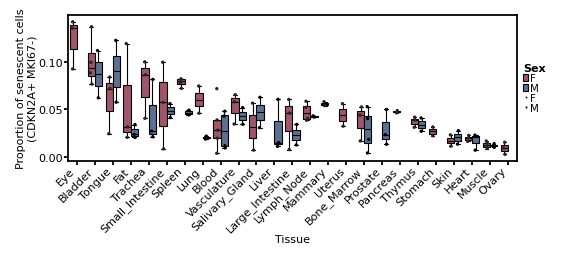

In [63]:
import TS_colorDict
sex_color_dict = TS_colorDict.sex_colors()
sex_color_dict = {"F": '#ac4962', 'M': '#546e9a'}
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
fig, ax = plt.subplots(figsize = (3.6,1.2))
# sns.barplot(data = freq_table, x  = "tissue", y = "Cell proportions", hue = "Sex", errwidth = 0.5, ax = ax, palette= sex_color_dict)
sns.boxplot(data = freq_table, x  = "tissue", y = "Cell proportions", hue = "Sex", ax = ax, palette= sex_color_dict, linecolor="black", linewidth=0.5, fliersize = 0)
sns.stripplot(data = freq_table, x  = "tissue", y = "Cell proportions", hue = "Sex", dodge=True, marker = "o", color="black", size=1.5, alpha=1.0) #"$\circ$"
plt.legend(ncol=1, handletextpad=0.2, markerscale = 0.6, labelspacing = 0.0,
           frameon = False, borderpad=0.5, columnspacing=0.5,
           borderaxespad = 0.1, loc = 6, bbox_to_anchor = (1.0, 0.5),
           title = "Sex", alignment = "left", title_fontproperties={'weight':'bold'})
plt.xticks(rotation=45, fontsize = 5, ha = "right", va = "top")
ax.tick_params(axis='both', which='major', size = 2, pad = 0)
ax.set_xlabel("Tissue", labelpad = 0.0)
ax.set_ylabel("Proportion of senescent cells\n(CDKN2A+ MKI67-)", labelpad = 0.5)
plt.savefig("human_figures/TS_senescence_tissues.pdf")

In [1]:
# tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)]
freq_table = tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)) & (tms_adata.obs["compartment"].isin(["Immune"]))].obs.groupby(['CDKN2A+ MKI67-', "donor", "tissue", "Sex"]).size().reset_index(name='count')
freq_table['total_count'] = freq_table.groupby(["donor", "tissue", "Sex"])['count'].transform('sum')
freq_table['Cell proportions'] = freq_table['count'] / freq_table['total_count']
freq_table = freq_table[freq_table["count"] > 0]
freq_table = freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"]
freq_table["tissue"] = freq_table["tissue"].astype(str)
freq_table = freq_table.sort_values(by="Cell proportions", ascending=False)
freq_table

NameError: name 'tms_adata' is not defined

In [1]:
import TS_colorDict
sex_color_dict = TS_colorDict.sex_colors()
sex_color_dict = {"F": '#ac4962', 'M': '#546e9a'}
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
fig, ax = plt.subplots(figsize = (3.6,1.2))
# sns.barplot(data = freq_table, x  = "tissue", y = "Cell proportions", hue = "Sex", errwidth = 1.0, ax = ax, palette= sex_color_dict)
sns.boxplot(data = freq_table, x  = "tissue", y = "Cell proportions", hue = "Sex", ax = ax, palette= sex_color_dict, linecolor="black", linewidth=0.5, fliersize = 0)
sns.stripplot(data =  freq_table, x  = "tissue", y = "Cell proportions", hue = "Sex", dodge=True, marker = "o", color="black", size=2.0, alpha=1.0)

plt.legend(ncol=1, handletextpad=0.2, markerscale = 0.6, labelspacing = 0.0,
           frameon = False, borderpad=0.5, columnspacing=0.5,
           borderaxespad = 0.1, loc = 6, bbox_to_anchor = (1.0, 0.5),
           title = "Sex", alignment = "left", title_fontproperties={'weight':'bold'})
plt.xticks(rotation=45, fontsize = 5, ha = "right", va = "top")
ax.tick_params(axis='both', which='major', size = 2, pad = 0)
ax.set_xlabel("Tissue", labelpad = 0.0)
ax.set_ylabel("Proportion of senescent cells\n(CDKN2A+ MKI67-)", labelpad = 0.5)
plt.savefig("human_figures/TS_immune_senescence_tissues.pdf")

NameError: name 'sc' is not defined

In [66]:
# tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)]
freq_table = tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)].obs.groupby(['CDKN2A+ MKI67-', "donor", "broad_cell_class", "Sex"]).size().reset_index(name='count')
freq_table['total_count'] = freq_table.groupby(["donor", "broad_cell_class", "Sex"])['count'].transform('sum')
freq_table['Cell proportions'] = freq_table['count'] / freq_table['total_count']
freq_table = freq_table[freq_table["count"] > 0]
freq_table = freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"]
freq_table["broad_cell_class"] = freq_table["broad_cell_class"].astype(str)
freq_table = freq_table.sort_values(by="Cell proportions", ascending=False)
freq_table

/tmp/ipykernel_597092/2571207027.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)].obs.groupby(['CDKN2A+ MKI67-', "donor", "broad_cell_class", "Sex"]).size().reset_index(name='count')
/tmp/ipykernel_597092/2571207027.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table['total_count'] = freq_table.groupby(["donor", "broad_cell_class", "Sex"])['count'].transform('sum')


,CDKN2A+ MKI67-,donor,broad_cell_class,Sex,count,total_count,Cell proportions
3010,Positive,TSP28,lymphocyte of b lineage,F,6,8,0.750000
1866,Positive,TSP5,ecto-epithelial cell,F,33,48,0.687500
2668,Positive,TSP21,ciliated epithelial cell,F,235,378,0.621693
1780,Positive,TSP4,ciliated epithelial cell,F,19,33,0.575758
2014,Positive,TSP7,ecto-epithelial cell,F,6,11,0.545455
...,...,...,...,...,...,...,...
1652,Positive,TSP2,epithelial cell of lung,F,8,4175,0.001916
2483,Positive,TSP14,granulocyte,M,49,31025,0.001579
2113,Positive,TSP8,granulocyte,M,6,4572,0.001312
2024,Positive,TSP7,erythroid lineage cell,F,10,7908,0.001265


/tmp/ipykernel_597092/3755645156.py:12: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.0}` instead.

  sns.barplot(data = freq_table, x  = "broad_cell_class", y = "Cell proportions", hue = "Sex", errwidth = 1.0, ax = ax, errorbar = "ci", palette= sex_color_dict)
/tmp/ipykernel_597092/3755645156.py:13: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data =  freq_table, x  = "broad_cell_class", y = "Cell proportions", hue = "Sex", dodge=True, marker = "o", color="black", size=2.0, alpha=1.0)


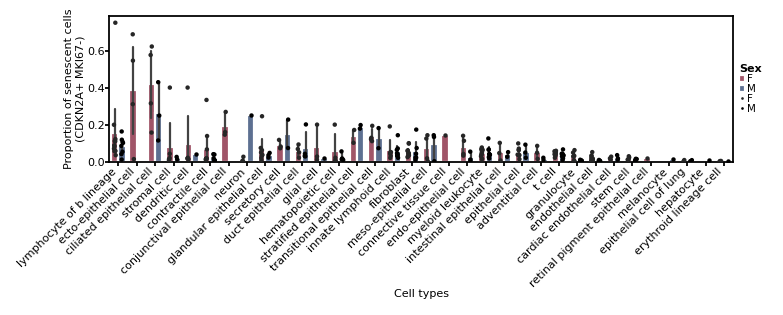

In [67]:
import TS_colorDict
sex_color_dict = TS_colorDict.sex_colors()
sex_color_dict = {"F": '#ac4962', 'M': '#546e9a'}
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
fig, ax = plt.subplots(figsize = (5.0,1.2))
sns.barplot(data = freq_table, x  = "broad_cell_class", y = "Cell proportions", hue = "Sex", errwidth = 1.0, ax = ax, errorbar = "ci", palette= sex_color_dict)
sns.stripplot(data =  freq_table, x  = "broad_cell_class", y = "Cell proportions", hue = "Sex", dodge=True, marker = "o", color="black", size=2.0, alpha=1.0)
plt.legend(ncol=1, handletextpad=0.2, markerscale = 0.6, labelspacing = 0.0,
           frameon = False, borderpad=0.5, columnspacing=0.5,
           borderaxespad = 0.1, loc = 6, bbox_to_anchor = (1.0, 0.5),
           title = "Sex", alignment = "left", title_fontproperties={'weight':'bold'})
plt.xticks(rotation=45, fontsize = 5, ha = "right", va = "top")
ax.tick_params(axis='both', which='major', size = 2, pad = 0)
ax.set_xlabel("Cell types", labelpad = 0.0)
ax.set_ylabel("Proportion of senescent cells\n(CDKN2A+ MKI67-)", labelpad = 0.5)
plt.savefig("human_figures/TS_senescence_celltypes.pdf")

In [68]:
# tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)]
freq_table = tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)) & (tms_adata.obs["compartment"].isin(["Immune"]))].obs.groupby(['CDKN2A+ MKI67-', "donor", "broad_cell_class", "Sex"]).size().reset_index(name='count')
freq_table['total_count'] = freq_table.groupby(["donor", "broad_cell_class", "Sex"])['count'].transform('sum')
freq_table['Cell proportions'] = freq_table['count'] / freq_table['total_count']
freq_table = freq_table[freq_table["count"] > 0]
freq_table = freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"]
freq_table["broad_cell_class"] = freq_table["broad_cell_class"].astype(str)
freq_table = freq_table.sort_values(by="Cell proportions", ascending=False)
freq_table

/tmp/ipykernel_597092/1176271962.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata[(tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)) & (tms_adata.obs["compartment"].isin(["Immune"]))].obs.groupby(['CDKN2A+ MKI67-', "donor", "broad_cell_class", "Sex"]).size().reset_index(name='count')
/tmp/ipykernel_597092/1176271962.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table['total_count'] = freq_table.groupby(["donor", "broad_cell_class", "Sex"])['count'].transform('sum')


,CDKN2A+ MKI67-,donor,broad_cell_class,Sex,count,total_count,Cell proportions
730,Positive,TSP28,lymphocyte of b lineage,F,6,8,0.750000
738,Positive,TSP30,dendritic cell,F,2,5,0.400000
744,Positive,TSP30,hematopoietic cell,F,4,20,0.200000
442,Positive,TSP4,lymphocyte of b lineage,F,54,271,0.199262
440,Positive,TSP4,innate lymphoid cell,F,8,42,0.190476
...,...,...,...,...,...,...,...
669,Positive,TSP25,erythroid lineage cell,M,1,449,0.002227
609,Positive,TSP14,stem cell,M,2,900,0.002222
599,Positive,TSP14,granulocyte,M,49,31025,0.001579
509,Positive,TSP8,granulocyte,M,6,4572,0.001312


/tmp/ipykernel_597092/3143482485.py:12: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.0}` instead.

  sns.barplot(data = freq_table, x  = "broad_cell_class", y = "Cell proportions", hue = "Sex", errwidth = 1.0, ax = ax, errorbar = "ci", palette= sex_color_dict)
/tmp/ipykernel_597092/3143482485.py:13: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data =  freq_table, x  = "broad_cell_class", y = "Cell proportions", hue = "Sex", dodge=True, marker = "o", color="black", size=2.0, alpha=1.0)


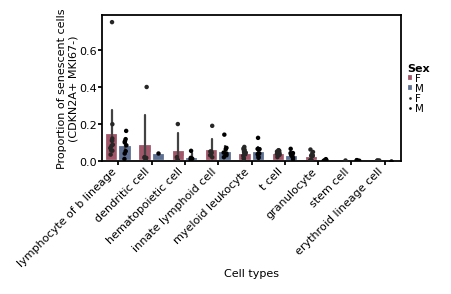

In [70]:
import TS_colorDict
sex_color_dict = TS_colorDict.sex_colors()
sex_color_dict = {"F": '#ac4962', 'M': '#546e9a'}
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
fig, ax = plt.subplots(figsize = (2.4,1.2))
sns.barplot(data = freq_table, x  = "broad_cell_class", y = "Cell proportions", hue = "Sex", errwidth = 1.0, ax = ax, errorbar = "ci", palette= sex_color_dict)
sns.stripplot(data =  freq_table, x  = "broad_cell_class", y = "Cell proportions", hue = "Sex", dodge=True, marker = "o", color="black", size=2.0, alpha=1.0)
plt.legend(ncol=1, handletextpad=0.2, markerscale = 0.6, labelspacing = 0.0,
           frameon = False, borderpad=0.5, columnspacing=0.5,
           borderaxespad = 0.1, loc = 6, bbox_to_anchor = (1.0, 0.5),
           title = "Sex", alignment = "left", title_fontproperties={'weight':'bold'})
plt.xticks(rotation=45, fontsize = 5, ha = "right", va = "top")
ax.tick_params(axis='both', which='major', size = 2, pad = 0)
ax.set_xlabel("Cell types", labelpad = 0.0)
ax.set_ylabel("Proportion of senescent cells\n(CDKN2A+ MKI67-)", labelpad = 0.5)
plt.savefig("human_figures/TS_immune_senescence_celltypes.pdf")

In [71]:
freq_table = tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)].obs.groupby(['CDKN2A+ MKI67-', "Age group", "Sex", "donor"]).size().reset_index(name='count')
# freq_table = tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)].obs.groupby(['CDKN2A+ MKI67-', "Age group", "Sex", "donor"]).size().reset_index(name='count')
freq_table['total_count'] = freq_table.groupby(["Age group", "Sex", "donor"])['count'].transform('sum')
freq_table = freq_table[freq_table["total_count"] > 0]
freq_table['Cell proportions'] = freq_table['count'] / freq_table['total_count']
freq_table = freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"]
print(freq_table.shape)

(21, 7)


/tmp/ipykernel_597092/1657075608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)].obs.groupby(['CDKN2A+ MKI67-', "Age group", "Sex", "donor"]).size().reset_index(name='count')
/tmp/ipykernel_597092/1657075608.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table['total_count'] = freq_table.groupby(["Age group", "Sex", "donor"])['count'].transform('sum')


In [72]:
freq_table["Age group"].value_counts()

Age group
Middle    10
Old        6
Young      5
Name: count, dtype: int64

/tmp/ipykernel_597092/1500365412.py:16: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data =  freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"],x  = "Age group", y = "Cell proportions", hue = "Sex", dodge=True, marker = "o", color="black", size=2.0, alpha=1.0)


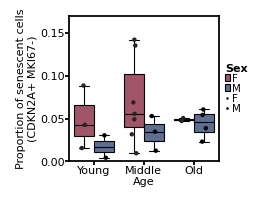

In [75]:
import TS_colorDict
sex_color_dict = TS_colorDict.sex_colors()
sex_color_dict = {"F": '#ac4962', 'M': '#546e9a'}

sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
fig, ax = plt.subplots(figsize = (1.2,1.2))
plt.margins(x=0, y=0)
# sns.barplot(data = freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"], x  = "Age group", y = "Cell proportions", hue = "Sex", errwidth = 1.0, ax = ax, palette= sex_color_dict)
sns.boxplot(data =  freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"], x  = "Age group", y = "Cell proportions", hue = "Sex", ax = ax, palette= sex_color_dict, linecolor="black", linewidth=0.5, fliersize = 0)
sns.stripplot(data =  freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"],x  = "Age group", y = "Cell proportions", hue = "Sex", dodge=True, marker = "o", color="black", size=2.0, alpha=1.0)

plt.legend(ncol=1, handletextpad=0.2, markerscale = 0.6, labelspacing = 0.0,
           frameon = False, borderpad=0.5, columnspacing=0.5,
           borderaxespad = 0.1, loc = 6, bbox_to_anchor = (1.0, 0.5),
           title = "Sex", alignment = "left", title_fontproperties={'weight':'bold'})
ax.tick_params(axis='both', which='major', pad=0, size = 2)
ax.set_xlabel("Age", labelpad = 0.5)
ax.set_ylabel("Proportion of senescent cells\n(CDKN2A+ MKI67-)", labelpad = 1.0)
plt.ylim(0,.17)
plt.savefig("human_figures/TS_senescence_age_discrete1.pdf")

In [ ]:
# Cross tabulation between Cdkn2a and age
Crosstab_cdkn2a = pd.crosstab(index=tms_adata.obs['CDKN2A+ MKI67-'],columns=tms_adata.obs['Age'])
print(Crosstab_cdkn2a)

In [9]:
freq_table = tms_adata.obs.groupby(['CDKN2A+ MKI67-', "Age", "Sex", "tissue", "donor"]).size().reset_index(name='count')
freq_table['total_count'] = freq_table.groupby(["Age", "Sex", "donor", "tissue"])['count'].transform('sum')
freq_table = freq_table[freq_table["total_count"] > 0]
# temp = tms_adata.obs.groupby(["donor", "tissue"]).size().reset_index(name='count')
# temp = temp[temp["count"] > 0]
# # temp = pd.merge(temp, pd.DataFrame(temp.groupby(["donor"]).size(), columns=["donor_size"]).reset_index())
# temp = pd.DataFrame(temp.groupby(["donor"]).size(), columns=["donor_size"])
# freq_table = freq_table[freq_table["donor"].isin(temp[temp["donor_size"] > 4].index.values)]
freq_table['Cell proportions'] = freq_table['count'] / freq_table['total_count']
print(freq_table.shape)
freq_table["Age"] = freq_table["Age"].astype(int)
freq_table = freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"]

(246, 8)


/tmp/ipykernel_3540756/1422037954.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata.obs.groupby(['CDKN2A+ MKI67-', "Age", "Sex", "tissue", "donor"]).size().reset_index(name='count')
/tmp/ipykernel_3540756/1422037954.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table['total_count'] = freq_table.groupby(["Age", "Sex", "donor", "tissue"])['count'].transform('sum')


In [10]:
new_table1 = freq_table.reset_index().pivot(index='donor', columns='tissue', values='Cell proportions')*100
new_table1 = new_table1.loc[freq_table[["Age", "donor"]].drop_duplicates().sort_values(by = "Age")["donor"].values]
new_table1.loc[:,:] = 4
new_table1 = new_table1.T
# new_table1 = new_table1.loc[tissue_order, celltype_order]

new_table2 = freq_table.pivot(index='donor', columns='tissue', values='Cell proportions')*100
new_table2 = new_table2.loc[freq_table[["Age", "donor"]].drop_duplicates().sort_values(by = "Age")["donor"].values]
new_table2= new_table2.T
# new_table2.loc[:,:] = 100
# new_table2 = new_table2.loc[tissue_order, celltype_order]

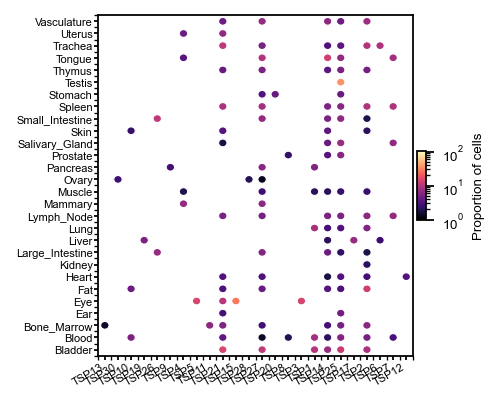

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
plt.rcParams['axes.axisbelow'] = True

N = new_table1.shape[0]
M = new_table1.shape[1]
ylabels = new_table1.index
xlabels = new_table1.columns

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = new_table1.to_numpy()
c = new_table2.to_numpy()
# print(c.flatten())
# print(s.flatten())

fig, ax = plt.subplots(1,1,figsize=(3.0,2.8))

R = ((s/100.0)*4)*2
sns.blend_palette(["lightgrey", sns.xkcd_rgb["darkblue"]], as_cmap=True)


c = np.add(c, 1)
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="magma",
                      edgecolor = "white",
                      linewidth = 0.5)

import matplotlib.colors as colors
col.norm=colors.LogNorm()
col.set_clim([1, 101])
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)

ax.tick_params(axis='both', which='major', pad=0.5, size = 2, labelsize = 5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.colorbar(col, shrink=0.20, aspect = 7, pad=0.01, label = "Proportion of cells")

plt.savefig("human_figures/donor_tissue_sc_prop_full.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [86]:
freq_table = tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)].obs.groupby(['CDKN2A+ MKI67-', "Age", "Sex", "tissue", "donor"]).size().reset_index(name='count')
freq_table['total_count'] = freq_table.groupby(["Age", "Sex", "donor", "tissue"])['count'].transform('sum')
freq_table = freq_table[freq_table["total_count"] > 0]
# temp = tms_adata.obs.groupby(["donor", "tissue"]).size().reset_index(name='count')
# temp = temp[temp["count"] > 0]
# # temp = pd.merge(temp, pd.DataFrame(temp.groupby(["donor"]).size(), columns=["donor_size"]).reset_index())
# temp = pd.DataFrame(temp.groupby(["donor"]).size(), columns=["donor_size"])
# freq_table = freq_table[freq_table["donor"].isin(temp[temp["donor_size"] > 4].index.values)]
freq_table['Cell proportions'] = freq_table['count'] / freq_table['total_count']
print(freq_table.shape)
freq_table["Age"] = freq_table["Age"].astype(int)
freq_table = freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"]

(230, 8)


/tmp/ipykernel_597092/3524529325.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)].obs.groupby(['CDKN2A+ MKI67-', "Age", "Sex", "tissue", "donor"]).size().reset_index(name='count')
/tmp/ipykernel_597092/3524529325.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table['total_count'] = freq_table.groupby(["Age", "Sex", "donor", "tissue"])['count'].transform('sum')


/tmp/ipykernel_597092/2937856392.py:14: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.0}` instead.

  sns.barplot(data = freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"], x  = "Age", y = "Cell proportions", hue = "Sex", errwidth = 1.0, ax = ax, palette= sex_color_dict)


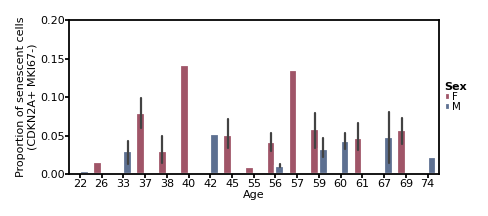

In [87]:
import TS_colorDict
sex_color_dict = TS_colorDict.sex_colors()
sex_color_dict = {"F": '#ac4962', 'M': '#546e9a'}

sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
fig, ax = plt.subplots(figsize = (3.0,1.3))
plt.margins(x=0, y=0)
sns.barplot(data = freq_table[freq_table['CDKN2A+ MKI67-'] == "Positive"], x  = "Age", y = "Cell proportions", hue = "Sex", errwidth = 1.0, ax = ax, palette= sex_color_dict)
plt.legend(ncol=1, handletextpad=0.2, markerscale = 0.6, labelspacing = 0.0,
           frameon = False, borderpad=0.5, columnspacing=0.5,
           borderaxespad = 0.1, loc = 6, bbox_to_anchor = (1.0, 0.5),
           title = "Sex", alignment = "left", title_fontproperties={'weight':'bold'})
ax.tick_params(axis='both', which='major', pad=0, size = 2, labelsize = 5)
ax.set_xlabel("Age", labelpad = 0.5)
ax.set_ylabel("Proportion of senescent cells\n(CDKN2A+ MKI67-)", labelpad = 1.0)
plt.ylim(0,.20)
plt.tight_layout()
plt.savefig("./human_figures/TS_senescence_age_continous.pdf")

In [90]:
# tms_adata.write_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_filtered_200gene_2500UMI_donorassay_version2d_withmetadata_processed0.h5ad")
# tms_adata.obs.to_csv("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_metadata_filtered0.csv")

In [4]:
tms_adata = sc.read_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_filtered_200gene_2500UMI_donorassay_version2d_withmetadata_processed0.h5ad")
tms_adata

AnnData object with n_obs × n_vars = 1136218 × 61806
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', 'age', 'sex', 'ethnicity', 'sample_number', 'Donors', 'Age', 'Sex', 'Ethnicity', 'Race', 'BMI (kg/m2)', 'Downtime (min)', 'Cause of Death', 'Tobacco ( > 20 pack-years)', 'Alcohol', 'IV Drug abuse', 'Diabetes', 'Cancer', 'Hypertension', 'Coronary Artery Disease', 'Other noted conditions', 'donor_tissue_celltype', 'tissue_celltype', 'donor_tissue_broadcelltype', 'tissue_broadcelltype', 'CDKN2A+ MKI67-', 'broader_cell_cl

In [5]:
tms_adata

AnnData object with n_obs × n_vars = 1136218 × 61806
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', 'age', 'sex', 'ethnicity', 'sample_number', 'Donors', 'Age', 'Sex', 'Ethnicity', 'Race', 'BMI (kg/m2)', 'Downtime (min)', 'Cause of Death', 'Tobacco ( > 20 pack-years)', 'Alcohol', 'IV Drug abuse', 'Diabetes', 'Cancer', 'Hypertension', 'Coronary Artery Disease', 'Other noted conditions', 'donor_tissue_celltype', 'tissue_celltype', 'donor_tissue_broadcelltype', 'tissue_broadcelltype', 'CDKN2A+ MKI67-', 'broader_cell_cl

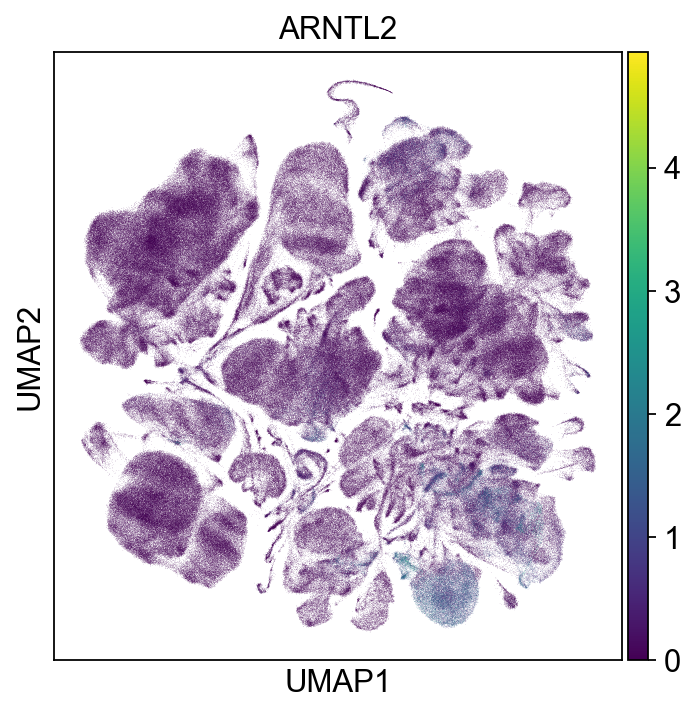

In [10]:
sc.pl.umap(tms_adata, color = "ARNTL2")

In [8]:
freq_table tms_adataata.obs.drop_duplicates(subset=["donor", "tissue", "Sex"]).groupby(["tissue", "Sex"]).size().reset_index(name='count')
freq_table["tissue_Sex"] = freq_table["tissue"].astype(str) + "_" + freq_table["Sex"].astype(str)
tissue_sex_filter = freq_table[freq_table["count"] > 1].tissue_Sex.values
tissue_sex_filter

/tmp/ipykernel_3540756/558152723.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata.obs.drop_duplicates(subset=["donor", "tissue", "Sex"]).groupby(["tissue", "Sex"]).size().reset_index(name='count')


array(['Bladder_F', 'Bladder_M', 'Blood_F', 'Blood_M', 'Bone_Marrow_F',
       'Bone_Marrow_M', 'Eye_F', 'Fat_F', 'Fat_M', 'Heart_F', 'Heart_M',
       'Large_Intestine_F', 'Large_Intestine_M', 'Liver_M', 'Lung_F',
       'Lung_M', 'Lymph_Node_F', 'Lymph_Node_M', 'Mammary_F', 'Muscle_F',
       'Muscle_M', 'Ovary_F', 'Pancreas_F', 'Prostate_M',
       'Salivary_Gland_F', 'Salivary_Gland_M', 'Skin_F', 'Skin_M',
       'Small_Intestine_F', 'Small_Intestine_M', 'Spleen_F', 'Spleen_M',
       'Stomach_F', 'Thymus_F', 'Thymus_M', 'Tongue_F', 'Tongue_M',
       'Trachea_F', 'Trachea_M', 'Uterus_F', 'Vasculature_F',
       'Vasculature_M'], dtype=object)

In [10]:
# tms_adata.X = tms_adata.layers["raw_counts"]
# tms_adata[tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)].write_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_filtered_tissue_sex_filtered_raw_counts_with_metadata_python3919.h5ad")

In [4]:
tms_adata = sc.read_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_filtered_tissue_sex_filtered_raw_counts_with_metadata_python3919.h5ad")
tms_adata

AnnData object with n_obs × n_vars = 1084069 × 61806
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', 'age', 'sex', 'ethnicity', 'sample_number', 'Donors', 'Age', 'Sex', 'Ethnicity', 'Race', 'BMI (kg/m2)', 'Downtime (min)', 'Cause of Death', 'Tobacco ( > 20 pack-years)', 'Alcohol', 'IV Drug abuse', 'Diabetes', 'Cancer', 'Hypertension', 'Coronary Artery Disease', 'Other noted conditions', 'donor_tissue_celltype', 'tissue_celltype', 'donor_tissue_broadcelltype', 'tissue_broadcelltype', 'CDKN2A+ MKI67-', 'broader_cell_cl

In [7]:
# tms_adata.obs['CDKN1A+'] = np.where((tms_adata[:,['CDKN1A']].to_df()["CDKN1A"]>0.0), 'Positive', 'Negative')
# tms_adata.obs['CDKN1A+'].value_counts()
# tms_adata.obs['IL6+'] = np.where((tms_adata[:,['IL6']].to_df()["IL6"]>0.0), 'Positive', 'Negative')
# tms_adata.obs['IL6+'].value_counts()
# tms_adata.obs['IL1A+'] = np.where((tms_adata[:,['IL1A']].to_df()["IL1A"]>0.0), 'Positive', 'Negative')
# tms_adata.obs['IL1A+'].value_counts()
# tms_adata.obs['IL1B+'] = np.where((tms_adata[:,['IL1B']].to_df()["IL1B"]>0.0), 'Positive', 'Negative')
# tms_adata.obs['IL1B+'].value_counts()
# tms_adata.obs['SERPINE1+'] = np.where((tms_adata[:,['SERPINE1']].to_df()["SERPINE1"]>0.0), 'Positive', 'Negative')
# tms_adata.obs['SERPINE1+'].value_counts()
# tms_adata.obs['BCL2+'] = np.where((tms_adata[:,['BCL2']].to_df()["BCL2"]>0.0), 'Positive', 'Negative')
# tms_adata.obs['BCL2+'].value_counts()
# tms_adata.obs['HMGB1+'] = np.where((tms_adata[:,['HMGB1']].to_df()["HMGB1"]>0.0), 'Positive', 'Negative')
# tms_adata.obs['HMGB1+'].value_counts()
# tms_adata.obs['LMNB1+'] = np.where((tms_adata[:,['HMGB1']].to_df()["HMGB1"]>0.0), 'Positive', 'Negative')
# tms_adata.obs['LMNB1+'].value_counts()
# tms_adata.obs['LMNB1+'] = np.where((tms_adata[:,['HMGB1']].to_df()["HMGB1"]>0.0), 'Positive', 'Negative')
# tms_adata.obs['LMNB1+'].value_counts()

In [15]:
# tms_adataort scipy as sp
# sp.sparse.save_npz('./../tabula_sapiens/raw_counts.npz', tms_adata.layers['raw_counts'])
# tms_adata.obs.to_csv("./../tabula_sapiens/meta.data.csv")
# tms_adata.var[["ensembl_id", "gene_symbol", "genome", "mt", "ercc"]].to_csv("./../tabula_sapiens/var.data.csv")

In [5]:
# tms_adata[tms_adata.obs['CDKN2A+ MKI67-'] == "Positive"].write_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_senescent_cells.h5ad")
# tms_adata[tms_adata.obs['CDKN2A+ MKI67-'] == "Negative"].write_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_nonsenescent_cells.h5ad")

In [6]:
# tms_adata.X = tms_adata.layers["raw_counts"]
# tms_adata[tms_adata.obs['CDKN2A+ MKI67-'] == "Positive"].write_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2c_raw_counts_senescent_cells.h5ad")
# tms_adata[tms_adata.obs['CDKN2A+ MKI67-'] == "Negative"].write_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2c_raw_counts_nonsenescent_cells.h5ad")

In [12]:
# tms_adata.X = tms_adata.layers["raw_counts"]

In [16]:
temp = tms_adata[((tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)) & (tms_adata.obs["CDKN2A+ MKI67-"] == "Positive")),:].to_df()
temp["broadcelltype"] = tms_adata[((tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)) & (tms_adata.obs["CDKN2A+ MKI67-"] == "Positive")),:].obs["broad_cell_class"]
import anndata as ad
temp_adata = ad.AnnData(X=temp.groupby(['broadcelltype']).mean())
del temp
temp_adata.obs["index"] = temp_adata.obs_names
temp_adata.obs["broadcelltype"] = temp_adata.obs['index']

# metadata = pd.read_csv("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_metadata_filtered0.csv", index_col=0)
# donor_tissue_celltype_metadata = metadata[["donor", "tissue", "broad_cell_class"]]
# donor_tissue_celltype_metadata = donor_tissue_celltype_metadata.reset_index(drop=True).drop_duplicates()
# donor_tissue_celltype_metadata["donor_tissue_broadcelltype"] = donor_tissue_celltype_metadata[["donor", "tissue","broad_cell_class"]].apply(lambda row: '__'.join(row.values.astype(str)), axis=1)
# donor_tissue_celltype_metadata.index = donor_tissue_celltype_metadata["donor_tissue_broadcelltype"]

# donor_tissue_celltype_metadata = donor_tissue_celltype_metadata.loc[temp_adata.obs_names]
# temp_adata.obs = donor_tissue_celltype_metadata

# print(temp_adata.shape)
# print(np.max(temp_adata.X))

/tmp/ipykernel_3086701/3555632684.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_adata = ad.AnnData(X=temp.groupby(['broadcelltype']).mean())


In [17]:
# metadata = pd.read_csv("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_metadata_filtered0.csv", index_col=0)
# donor_tissue_celltype_metadata = metadata["broad_cell_class"]
# donor_tissue_celltype_metadata = donor_tissue_celltype_metadata.reset_index(drop=True).drop_duplicates()
# donor_tissue_celltype_metadata["donor_tissue_broadcelltype"] = donor_tissue_celltype_metadata[["donor", "tissue","broad_cell_class"]].apply(lambda row: '__'.join(row.values.astype(str)), axis=1)
# donor_tissue_celltype_metadata.index = donor_tissue_celltype_metadata["donor_tissue_broadcelltype"]

# donor_tissue_celltype_metadata = donor_tissue_celltype_metadata.loc[temp_adata.obs_names]
# temp_adata.obs = donor_tissue_celltype_metadata

print(temp_adata.shape)
print(np.max(temp_adata.X))

(34, 61806)
8.589798


In [18]:
# temp_adata.write_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_senescent_cells_by_broadcelltype.h5ad")

In [ ]:
temp = tms_adata[((tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)) & (tms_adata.obs["CDKN2A+ MKI67-"] == "Negative")),:].to_df()
temp["broadcelltype"] = tms_adata[((tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)) & (tms_adata.obs["CDKN2A+ MKI67-"] == "Negative")),:].obs["broadcelltype"]
import anndata as ad
temp_adata = ad.AnnData(X=temp.groupby(['broadcelltype']).mean())
del temp
temp_adata.obs["index"] = temp_adata.obs_names
temp_adata.obs["broadcelltype"] = temp_adata.obs['index']

In [ ]:
temp_adata

In [ ]:
# metadata = pd.read_csv("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_metadata_filtered0.csv", index_col=0)
# donor_tissue_celltype_metadata = metadata[["tissue", "broad_cell_class"]]
# donor_tissue_celltype_metadata = donor_tissue_celltype_metadata.reset_index(drop=True).drop_duplicates()
# donor_tissue_celltype_metadata["tissue_broadcelltype"] = donor_tissue_celltype_metadata[["tissue","broad_cell_class"]].apply(lambda row: '__'.join(row.values.astype(str)), axis=1)
# donor_tissue_celltype_metadata.index = donor_tissue_celltype_metadata["tissue_broadcelltype"]

# donor_tissue_celltype_metadata = donor_tissue_celltype_metadata.loc[temp_adata.obs_names]
# temp_adata.obs = donor_tissue_celltype_metadata

# print(temp_adata.shape)
# print(np.max(temp_adata.X))

In [10]:
# temp_adata.write_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_version2d_nonsenescent_cells_by_tissue_broadcelltype.h5ad")

In [4]:
tms_adata = sc.read_h5ad("./../tabula_sapiens/TabulaSapiens_subset_objects_V2/TSP1_30_filtered_200gene_2500UMI_donorassay_version2d_withmetadata_processed0.h5ad")
tms_adata

AnnData object with n_obs × n_vars = 1136218 × 61806
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', 'age', 'sex', 'ethnicity', 'sample_number', 'Donors', 'Age', 'Sex', 'Ethnicity', 'Race', 'BMI (kg/m2)', 'Downtime (min)', 'Cause of Death', 'Tobacco ( > 20 pack-years)', 'Alcohol', 'IV Drug abuse', 'Diabetes', 'Cancer', 'Hypertension', 'Coronary Artery Disease', 'Other noted conditions', 'donor_tissue_celltype', 'tissue_celltype', 'donor_tissue_broadcelltype', 'tissue_broadcelltype', 'CDKN2A+ MKI67-', 'broader_cell_cl

In [10]:
freq_table = tms_adata.obs.drop_duplicates(subset=["donor", "tissue", "Sex"]).groupby(["tissue", "Sex"]).size().reset_index(name='count')
freq_table["tissue_Sex"] = freq_table["tissue"].astype(str) + "_" + freq_table["Sex"].astype(str)
tissue_sex_filter = freq_table[freq_table["count"] > 1].tissue_Sex.values
tissue_sex_filter

/tmp/ipykernel_2267920/558152723.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = tms_adata.obs.drop_duplicates(subset=["donor", "tissue", "Sex"]).groupby(["tissue", "Sex"]).size().reset_index(name='count')


array(['Bladder_F', 'Bladder_M', 'Blood_F', 'Blood_M', 'Bone_Marrow_F',
       'Bone_Marrow_M', 'Eye_F', 'Fat_F', 'Fat_M', 'Heart_F', 'Heart_M',
       'Large_Intestine_F', 'Large_Intestine_M', 'Liver_M', 'Lung_F',
       'Lung_M', 'Lymph_Node_F', 'Lymph_Node_M', 'Mammary_F', 'Muscle_F',
       'Muscle_M', 'Ovary_F', 'Pancreas_F', 'Prostate_M',
       'Salivary_Gland_F', 'Salivary_Gland_M', 'Skin_F', 'Skin_M',
       'Small_Intestine_F', 'Small_Intestine_M', 'Spleen_F', 'Spleen_M',
       'Stomach_F', 'Thymus_F', 'Thymus_M', 'Tongue_F', 'Tongue_M',
       'Trachea_F', 'Trachea_M', 'Uterus_F', 'Vasculature_F',
       'Vasculature_M'], dtype=object)

In [21]:
tms_adata[((tms_adata.obs["tissue_Sex"].isin(tissue_sex_filter)) & (tms_adata.obs["CDKN2A+ MKI67-"] == "Positive")),:]

View of AnnData object with n_obs × n_vars = 48114 × 61806
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', 'age', 'sex', 'ethnicity', 'sample_number', 'Donors', 'Age', 'Sex', 'Ethnicity', 'Race', 'BMI (kg/m2)', 'Downtime (min)', 'Cause of Death', 'Tobacco ( > 20 pack-years)', 'Alcohol', 'IV Drug abuse', 'Diabetes', 'Cancer', 'Hypertension', 'Coronary Artery Disease', 'Other noted conditions', 'donor_tissue_celltype', 'tissue_celltype', 'donor_tissue_broadcelltype', 'tissue_broadcelltype', 'CDKN2A+ MKI67-', 'broader_c

In [17]:
import TS_colorDict

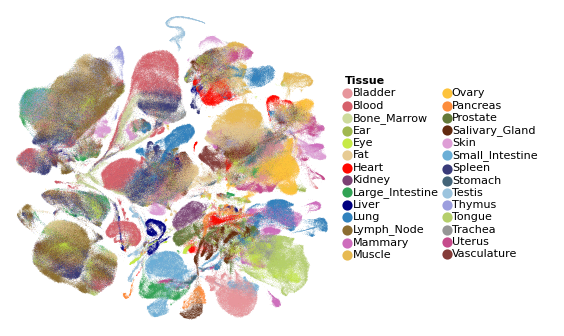

In [91]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.5, 2.5))
plt.margins(x=0, y=0)
sc.pl.umap(tms_adata, color = ['tissue'], size=0.1, legend_fontsize=5, sort_order=False, frameon=False,
           title="", na_in_legend = False, show=False, palette=TS_colorDict.tissue_colors(), ax = ax)
plt.legend(ncol=2, prop={'size': 5}, handletextpad=0.2, markerscale = 0.6, frameon = False, borderpad=1, columnspacing=0.5,
           labelspacing = 0.2, loc = 6, bbox_to_anchor = (1.0,0.5), title = "Tissue", alignment = "left",
          title_fontproperties={'weight':'bold'})
# ax.set_ylabel("UMAP2", labelpad = 0.5)
# ax.set_xlabel("UMAP1", labelpad = 0.5)
plt.savefig("human_figures/TS_umap_tissue.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False)

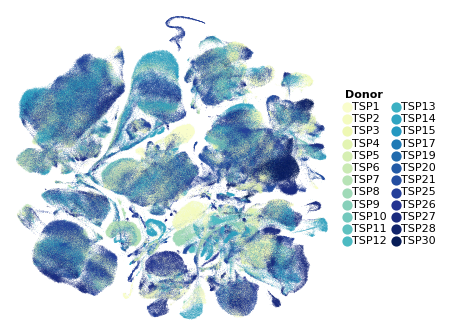

In [74]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.5, 2.5))
plt.margins(x=0, y=0)
sc.pl.umap(tms_adata, color = ['donor'], size=0.1, legend_fontsize=5, sort_order=False, frameon=False,
           title="", na_in_legend = False, show=False, palette=TS_colorDict.donor_colors(), ax = ax)
plt.legend(ncol=2, prop={'size': 5}, handletextpad=0.2, markerscale = 0.6, frameon = False, borderpad=1, columnspacing=0.5,
           labelspacing = 0.2, loc = 6, bbox_to_anchor = (1.0,0.5), title = "Donor", alignment = "left",
          title_fontproperties={'weight':'bold'})
# ax.set_ylabel("UMAP2", labelpad = 0.5)
# ax.set_xlabel("UMAP1", labelpad = 0.5)
plt.savefig("human_figures/TS_umap_donor.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False)

In [76]:
age_group_colors = {"Young": '#70be74', 'Middle': '#f5e849', "Old" : "#3a0c52"}

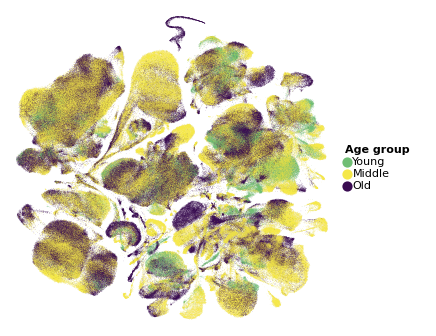

In [77]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.5, 2.5))
plt.margins(x=0, y=0)
sc.pl.umap(tms_adata, color = ['Age group'], size=0.1, legend_fontsize=5, sort_order=False, frameon=False,
           title="", na_in_legend = False, show=False, palette = age_group_colors, ax = ax)
plt.legend(ncol=1, prop={'size': 5}, handletextpad=0.2, markerscale = 0.6, frameon = False, borderpad=1, columnspacing=0.5,
           labelspacing = 0.2, loc = 6, bbox_to_anchor = (1.0,0.5), title = "Age group", alignment = "left",
          title_fontproperties={'weight':'bold'})
# ax.set_ylabel("UMAP2", labelpad = 0.5)
# ax.set_xlabel("UMAP1", labelpad = 0.5)
plt.savefig("human_figures/TS_umap_age.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False)

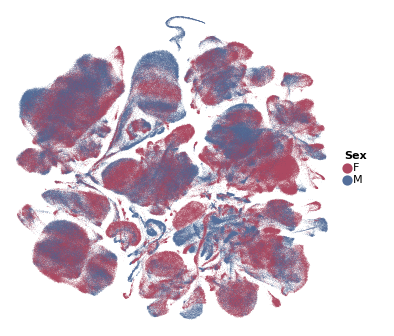

In [78]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=5, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.5, 2.5))
plt.margins(x=0, y=0)
sc.pl.umap(tms_adata, color = ['Sex'], size=0.1, legend_fontsize=5, sort_order=False, frameon=False,
           title="", na_in_legend = False, show=False, palette= {"F": '#ac4962', 'M': '#546e9a'}, ax = ax)
plt.legend(ncol=1, prop={'size': 5}, handletextpad=0.2, markerscale = 0.6, frameon = False, borderpad=1, columnspacing=0.5,
           labelspacing = 0.2, loc = 6, bbox_to_anchor = (1.0,0.5), title = "Sex", alignment = "left",
          title_fontproperties={'weight':'bold'})
# ax.set_ylabel("UMAP2", labelpad = 0.5)
# ax.set_xlabel("UMAP1", labelpad = 0.5)
plt.savefig("human_figures/TS_umap_sex.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False)

In [46]:
tms_adata.obs["method"] = tms_adata.obs["method"].cat.rename_categories({"smartseq2" : "smartseq"})
tms_adata.obs["method"].value_counts()

method
10X         1093048
smartseq      43287
Name: count, dtype: int64

In [47]:
TS_colorDict.method_colors()

{'10X': '#90ee90', 'smartseq2': '#006400'}